<a href="https://colab.research.google.com/github/ASBRUC/DSPS_ABruce/blob/main/HW10/higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
#imports
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import label_binarize
from pprint import pprint

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
#mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Remember tasks are not completed if you do not comment on the results and include captions

# Task 1 : data ingestion

- Download the Higgs boson data from Kaggle (programmatically within the notebook)

see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS_FBianco/blob/main/CodeDemos/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data. The command is `!kaggle competitions download......` (you may need to agree to the terms of condition of the higgs boson challenge on the kaggle webpage)


In [ ]:
cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
envs = json.load(open("kaggle.json", "r"))
os.environ["KAGGLE_USERNAME"] = envs['username']
os.environ["KAGGLE_KEY"] = envs['key']

In [ ]:
#ls

In [ ]:
# create a dsps folder and a data folder within it
#os.makedirs("higgsData", exist_ok=True)

In [ ]:
pwd

'/content/drive/MyDrive'

In [ ]:
cd higgsData/

/content/drive/MyDrive/higgsData


In [ ]:
#!kaggle datasets list
#works

In [ ]:
#kaggle competitions download -c higgs-boson

In [ ]:
#!unzip higgs-boson.zip

In [ ]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  random_submission.zip  training.csv
higgs-boson.zip                          test.zip               training.zip


In [ ]:
#!unzip training.zip

In [ ]:
#use the training dataset and make your own trainng test set later
higgsdata = pd.read_csv("training.csv")

# Task 2: data exploration

In [ ]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [ ]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


do everything else you need to explore the data.... (I can think of 4 more things we have done together)

In [ ]:
higgsdata.shape

(250000, 33)

In [ ]:
#higgsdata.info

In [ ]:
higgsdata.tail()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
249995,349995,-999.000,71.989,36.548,5.042,-999.0,-999.0,-999.0,1.392,5.042,...,0,-999.000,-999.0,-999.000,-999.0,-999.0,-999.0,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.0,-999.0,-999.0,2.585,22.439,...,0,-999.000,-999.0,-999.000,-999.0,-999.0,-999.0,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.0,-999.0,-999.0,2.390,22.183,...,1,41.992,1.8,-0.166,-999.0,-999.0,-999.0,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.0,-999.0,-999.0,3.365,13.504,...,0,-999.000,-999.0,-999.000,-999.0,-999.0,-999.0,0.000,1.681611,b
249999,349999,-999.000,72.756,70.831,7.479,-999.0,-999.0,-999.0,2.025,7.479,...,0,-999.000,-999.0,-999.000,-999.0,-999.0,-999.0,0.000,1.877474,b


In [ ]:
#higgsdata.dtypes

In [ ]:
higgsdata.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

# Task 3: data preparation


- Read in the trainind data. Extract the target variables. Split the provided training data into a training and a test set.

The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data (along any other variable you should remove) and create a separate variable `labels` and a separate variable `weights`, which will be your target variables for, respectively, classification and regression.



 you will use two target variables (you can read more about the data at https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf): find the corresponding columns of the DF and save them as labels and weights respectively

In [ ]:
higgsdata.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [ ]:
labels = higgsdata["Label"]
# 's' stands for signal, 'b' for background. You want to find new particles, i.e. "signal"

In [ ]:
weights = higgsdata["Weight"]
# the weight of the particle

In [ ]:
labels, weights

(0         s
 1         b
 2         b
 3         b
 4         b
          ..
 249995    b
 249996    b
 249997    s
 249998    b
 249999    b
 Name: Label, Length: 250000, dtype: object,
 0         0.002653
 1         2.233584
 2         2.347389
 3         5.446378
 4         6.245333
             ...   
 249995    4.505083
 249996    2.497259
 249997    0.018636
 249998    1.681611
 249999    1.877474
 Name: Weight, Length: 250000, dtype: float64)

In [ ]:
higgsdata.drop(["EventId", "Weight", "Label"], axis = 1, inplace=True)

In [ ]:
higgsdata.columns

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

use the "training.csv" file, but create your own train/test sets

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(higgsdata, labels,
                                                    train_size=0.75, test_size = 0.25, shuffle=True, random_state=302)

In [ ]:
train_regress_x, test_regress_x, train_regress_y, test_regress_y = train_test_split(higgsdata, weights,
                                                    train_size=0.75, test_size = 0.25, shuffle=True, random_state=302)

#Task 4: answer the question (you, not an AI...) why did I not ask you to scale the data like we did in the cluster models?

There is no reason to normalize the data because we are not comparing it to each other. The cluster models needed it to be comparable before clustering.

# Task 5: tree-based classifications

Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the `label` of the particles, i.e. if a particle is `Signal` or `Background`. Get the score of each model on both the training and test set, compare them training and test results and comment on the result for each model (adjust the hyperparameters if you need to)


In [122]:
# Look at parameters used by our current forest
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=4,
    n_jobs=-1, random_state=302)
rf.fit(train_x, train_y)

RandomForestClassifier(max_depth=4, n_jobs=-1, random_state=302)

In [123]:
gbt =  GradientBoostingClassifier(
    n_estimators=100,
    max_depth=4,
    random_state=302)

In [124]:
gbt.fit(train_x, train_y)

GradientBoostingClassifier(max_depth=4, random_state=302)

# Task 6: model evaluation

calculate the  scores for the training and test sets and compare etc

In [ ]:
print(f"the RF scores on the training test is {rf.score(train_x, train_y):.2%}, on the test is {rf.score(test_x, test_y):.2%}")
print("this indicates that the model is fitting correctly since the rf scores are so close together. \nThe model might be slightly overfitting since the test is greater but the values are so close I think it will still be a good representation.")
print(f"the GBT scores on the training test is {gbt.score(train_x, train_y):.2%}, on the test is {gbt.score(test_x, test_y):.2%}")
print("this indicates the model is fitting perfectly since the gbt scores are close and the training is greater than the test.")

the RF scores on the training test is 79.97%, on the test is 80.09%
this indicates that the model is fitting correctly since the rf scores are so close together. 
The model might be slightly overfitting since the test is greater but the values are so close I think it will still be a good representation.
the GBT scores on the training test is 83.88%, on the test is 83.82%
this indicates the model is fitting perfectly since the gbt scores are close and the training is greater than the test.


**Comment** is your model performing well? is it .... overfitting?

I think the models are performing well since the training and test rf and gbt scores are close for both. I am a little concerned about the rf traiing being less than the test but further exploration should show if it can be used as a good model. The values of over 80% is also in the range of what I would consider ideal for representing the data.

- Produce a confusion matrix for each model and compare them






In [129]:
# I creaded this function (mostly copied from sklearn examples).
# You can use it to create the confusion matrix, make sure you pass appropriate label

def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='', labels=["Signal", "Background"],
                          cmap=plt.cm.bone):
    """
    Plots a confusion matrix.

    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        normalize (bool, optional): If True, normalize the confusion matrix. Defaults to False.
        title (str, optional): Title of the plot. Defaults to ''.
        labels (list, optional): List of labels for the classes. Defaults to ["P", "N"].
        cmap (matplotlib.colors.Colormap, optional): Colormap for the plot. Defaults to plt.cm.bone.
    """
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'
    # Compute confusion matrix
    if normalize:
      cm = confusion_matrix(y_true, y_pred, normalize='all')
    else:
      cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(np.rot90(cm), cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    plt.xticks([0, 1], labels=labels[::-1])

    plt.text(0,1, cm[0,0], ha='center', c="k" if cm[0,0] > 0.1 * cm.sum() else "w")
    plt.text(0,0, cm[0,1], ha='center', c="k" if cm[0,1] > 0.1 * cm.sum() else "w")
    plt.text(1,1, cm[1,0], ha='center', c="k" if cm[1,0] > 0.1 * cm.sum() else "w")
    plt.text(1,0, cm[1,1], ha='center', c="k" if cm[1,1] > 0.1 * cm.sum() else "w")
    plt.ylim(-0.5,1.5)
    plt.yticks([0,1], labels=labels)
    plt.xlabel("prediction")
    plt.ylabel("truth")
    plt.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = plt.colorbar(im, cax=cax)

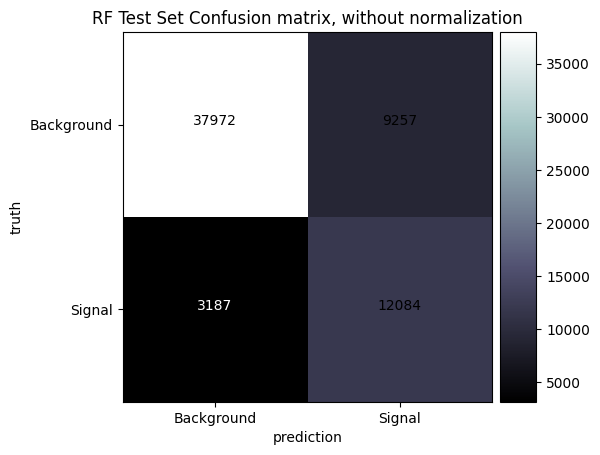

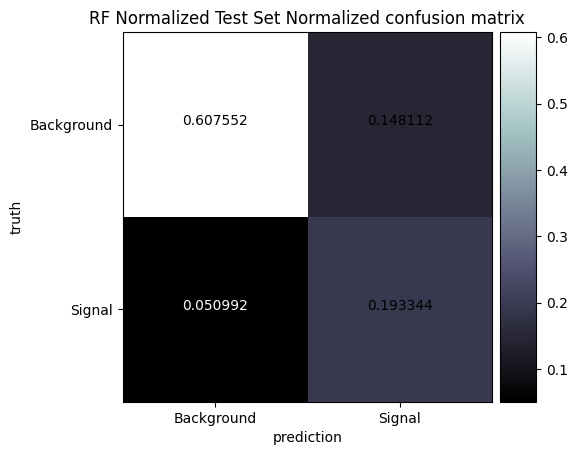

In [130]:
#for RF
plot_confusion_matrix(test_y, rf.predict(test_x), title="RF Test Set")
plot_confusion_matrix(test_y, rf.predict(test_x), normalize=True, title="RF Normalized Test Set")

**Figures 1 and 2:** Above are two confusion matrices for RF. The top or first matrix is not normalized, and the bottom or second matrix is normalized. <br>
The confusion matrices show the number of each data points of the predicted test that that are and are not correct and right in terms of prediction and truth, giving us four options. <br>
Looking at the matrices, there are an ideal proportion of the data that are false positives, about 20% total. With that amount (80% accuracy), the model is still accurate enough to be representative of the data.

In [ ]:
#do the same fo GBT, dont forget your captions!!

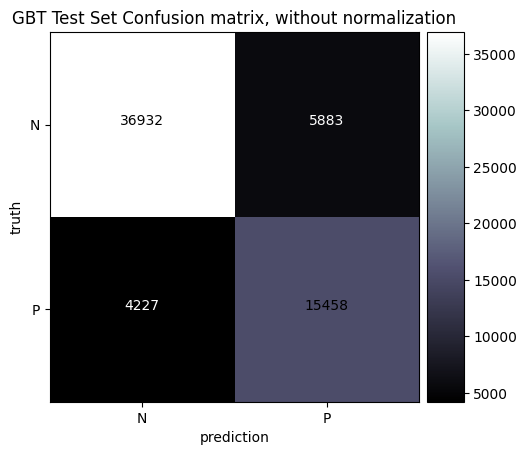

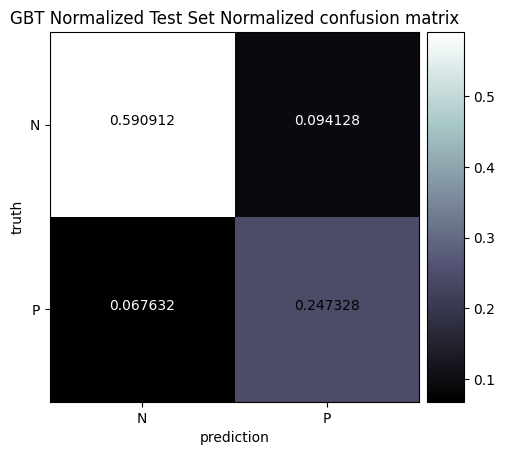

In [ ]:
plot_confusion_matrix(test_y, gbt.predict(test_x), title="GBT Test Set")
plot_confusion_matrix(test_y, gbt.predict(test_x), normalize=True, title="GBT Normalized Test Set")

**Figures 3 and 4:** Above are two confusion matrices for GBT. The top or first matrix is not normalized, and the bottom or second matrix is normalized. <br>
The confusion matrices show the number of each data points of the predicted test that that are and are not correct and right in terms of prediction and truth, giving us four options. <br>
Looking at the matrices, there are an ideal proportion of the data that are false positives, about 15% total. With that amount (85% accuracy), the model is quite accurate enough to be representative of the data.

Plot a simple ROC curve for the RF and GBT models  a d describe it in a caption.

In [ ]:
def plot_roc_curve(y_test, rf):
  y_test_binarized = label_binarize(y_test, classes=rf.classes_)
  n_classes = y_test_binarized.shape[1]
  y_prob_rf = rf.predict_proba(test_x)

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob_rf[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

  plt.figure()
  for i in range(n_classes):
      plt.plot(fpr[i], tpr[i], lw=2,
              label='{0} (area = {1:0.2f})'
              ''.format(rf.classes_[i], roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=2)
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Multi-class ROC for Random Forest')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
test_y.values.reshape(-1, 1).flatten() == "s"
#added values to get out of Series object

array([False, False,  True, ...,  True, False, False])

In [64]:
#this will be passed to the ROC function
#test_y.reshape(-1, 1).flatten() == "s"

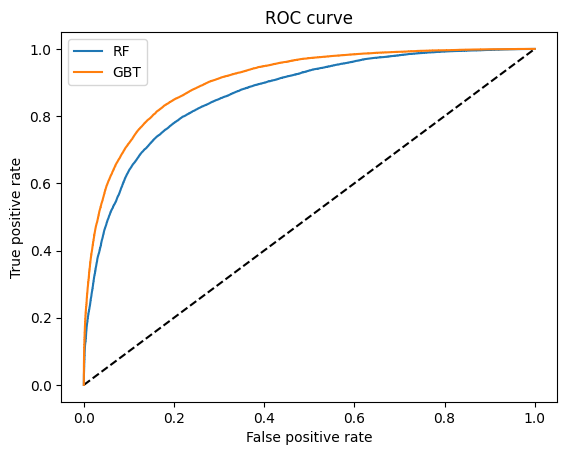

In [ ]:
# The random forest model by itself
y_pred_grd_rfcat = rf.predict_proba(test_x)[:, 1]
y_pred_grd_gbtcat = gbt.predict_proba(test_x)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_y.values.reshape(-1, 1).flatten()=="s", y_pred_grd_rfcat)
fpr_gbt, tpr_gbt, _ = roc_curve(test_y.values.reshape(-1, 1).flatten()=="s", y_pred_grd_gbtcat)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_gbt, tpr_gbt, label='GBT')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


**Figure 5:** Above is a ROC Curve for RF and GRB. On the x axis is the False positive rate and on the y axis is the True positive rate. <br> The plot shows the curve of the False positive rate vs the True positive rate for each model. The RF curve is represented in blue and the GBT label is represented in orange. It is worth mentioning the rates are normalized on both axes. <br> Both curves are in the upper left corner, which means the models have high True positive rates and low False positive rates, which is shows the models are successful. For the same reason, the GBT model seems to be performing more accurate since it is higher/closer to the corner.

#Task 7 required for 661, EC for 461, tree-based regression


- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test sets


In [ ]:
rfR = RandomForestRegressor(max_depth=3, random_state=302)
rfR.fit(train_regress_x, train_regress_y)
gbtR = GradientBoostingRegressor(max_depth=3, random_state=302)
gbtR.fit(train_regress_x, train_regress_y)

GradientBoostingRegressor(random_state=302)

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [65]:
def L1(y_true, y_pred):
  return np.mean(np.abs(y_true - y_pred))

def L2(y_true, y_pred):
  return np.mean((y_true - y_pred)**2)

In [66]:

print(f"L1 RF {L1(test_regress_y,  rfR.predict(test_regress_x)):.2f}, L2 RF {L2(test_regress_y, rfR.predict(test_regress_x)):.2f}")

L1 RF 1.00, L2 RF 1.82


In [67]:
print(f"L1 GBT {L1(test_regress_y,  gbtR.predict(test_regress_x)):.2f}, L2 GBT {L2(test_regress_y, gbtR.predict(test_regress_x)):.2f}")

L1 GBT 0.84, L2 GBT 1.36


**Discuss!**

#Task 8: Choose between feature importance and grid optimization (due for both 461 and 661)







# Task 8a: feature importance
Use the "Titanic notebook" as a guide for the feature importance analysis  https://github.com/fedhere/DSPS_FBianco/blob/main/Labs/DSPS_2025_titanictree.ipynb

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)

(your features may looks slightly different than mine)

Random Forest feature importance:
DER_mass_MMC 0.224 +/- 0.211
DER_mass_transverse_met_lep 0.217 +/- 0.197
DER_mass_vis 0.086 +/- 0.092
DER_pt_h 0.016 +/- 0.042
DER_deltaeta_jet_jet 0.056 +/- 0.076
DER_mass_jet_jet 0.03 +/- 0.058
DER_prodeta_jet_jet 0.004 +/- 0.012
DER_deltar_tau_lep 0.023 +/- 0.037
DER_pt_tot 0.004 +/- 0.009
DER_sum_pt 0.015 +/- 0.036
DER_pt_ratio_lep_tau 0.071 +/- 0.113
DER_met_phi_centrality 0.075 +/- 0.115
DER_lep_eta_centrality 0.024 +/- 0.044
PRI_tau_pt 0.09 +/- 0.119
PRI_tau_eta 0.0 +/- 0.001
PRI_tau_phi 0.0 +/- 0.0
PRI_lep_pt 0.005 +/- 0.015
PRI_lep_eta 0.001 +/- 0.004
PRI_lep_phi 0.0 +/- 0.0
PRI_met 0.021 +/- 0.04
PRI_met_phi 0.0 +/- 0.0
PRI_met_sumet 0.004 +/- 0.02
PRI_jet_num 0.008 +/- 0.016
PRI_jet_leading_pt 0.006 +/- 0.026
PRI_jet_leading_eta 0.002 +/- 0.01
PRI_jet_leading_phi 0.004 +/- 0.016
PRI_jet_subleading_pt 0.0 +/- 0.003
PRI_jet_subleading_eta 0.001 +/- 0.006
PRI_jet_subleading_phi 0.001 +/- 0.003
PRI_jet_all_pt 0.011 +/- 0.031


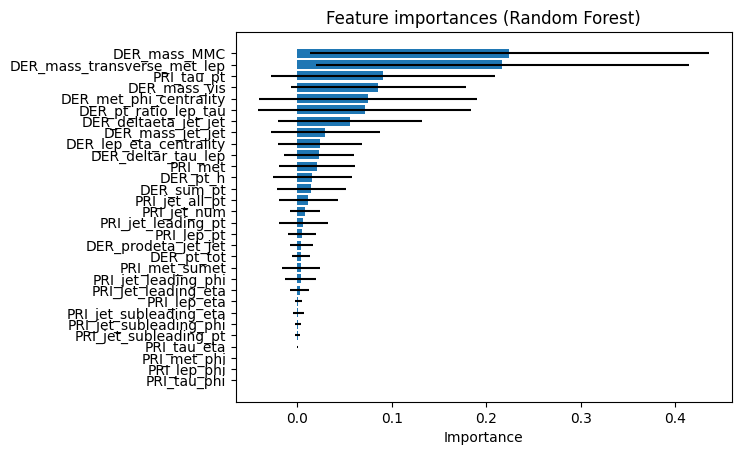

In [127]:
std_importance = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

print("Random Forest feature importance:")
for f, fi, s in zip(higgsdata.columns, rf.feature_importances_, std_importance):
  print(f, fi.round(3), "+/-", s.round(3))

indices_rf = np.argsort(rf.feature_importances_)

plt.figure()
plt.title("Feature importances (Random Forest)")
plt.barh(range(len(indices_rf)), rf.feature_importances_[indices_rf],
         xerr=std_importance[indices_rf], align="center")
plt.yticks(range(len(indices_rf)), [higgsdata.columns[i] for i in indices_rf])
plt.xlabel("Importance")
plt.show()

**Figure 6:** Above is the Feature importance histogram for Random Forest trees. The importance value is on the x axis and the features are on the y axis. <br> The thick blue lines represent the importance of each feature. The thinner black lines is the standard deviation of these values. <br> From the histogram we see the most important features such as DER_mass_MMC and DER_mass_tranverse_met_lep PRI_tau_pi, DER_MAS_vis. The majority of features have corresponding importance values close to 0.

Gradient Boosted Tree feature importance:
DER_mass_MMC 0.417
DER_mass_transverse_met_lep 0.243
DER_mass_vis 0.093
DER_pt_h 0.012
DER_deltaeta_jet_jet 0.034
DER_mass_jet_jet 0.008
DER_prodeta_jet_jet 0.001
DER_deltar_tau_lep 0.035
DER_pt_tot 0.006
DER_sum_pt 0.002
DER_pt_ratio_lep_tau 0.007
DER_met_phi_centrality 0.029
DER_lep_eta_centrality 0.017
PRI_tau_pt 0.05
PRI_tau_eta 0.004
PRI_tau_phi 0.0
PRI_lep_pt 0.001
PRI_lep_eta 0.008
PRI_lep_phi 0.0
PRI_met 0.006
PRI_met_phi 0.0
PRI_met_sumet 0.002
PRI_jet_num 0.005
PRI_jet_leading_pt 0.003
PRI_jet_leading_eta 0.016
PRI_jet_leading_phi 0.0
PRI_jet_subleading_pt 0.001
PRI_jet_subleading_eta 0.001
PRI_jet_subleading_phi 0.0
PRI_jet_all_pt 0.0


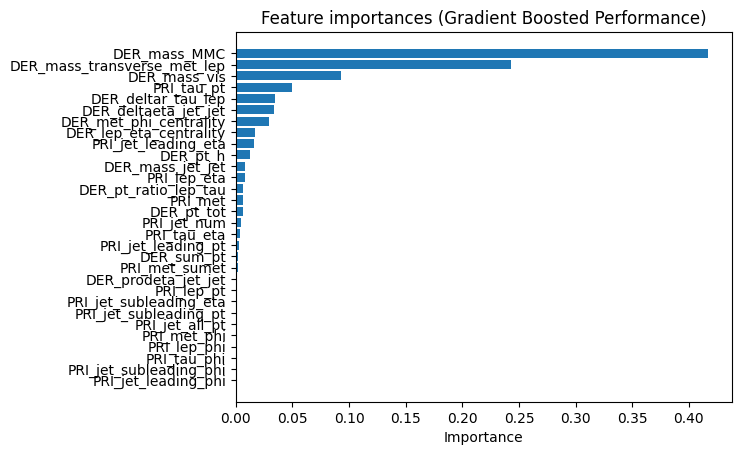

In [134]:
print("Gradient Boosted Tree feature importance:")
for f, fi in zip(higgsdata.columns, gbt.feature_importances_):
  print(f, fi.round(3))

indices_gbt = np.argsort(gbt.feature_importances_)

plt.figure()
plt.title("Feature importances (Gradient Boosted Performance)")
plt.barh(range(len(indices_gbt)), gbt.feature_importances_[indices_gbt], align="center")
plt.yticks(range(len(indices_gbt)), [higgsdata.columns[i] for i in indices_gbt])
plt.xlabel("Importance")
plt.show()

**Figure 7:** Above is the Feature importance histogram for Gradient Boosted Trees. The importance value is on the x axis and the features are on the y axis. <br> The thick blue lines represent the importance of each feature. <br> From the histogram we see that the most important features such as DER_mass_MMC, DER_mass_tranverse_met_lep, DER_mass_vis, PRI_tau_pt. The majority of features have corresponding importance values close to 0.

**Explanation:** From our most important features, we see that mass is a reoccuring feature. This means that when it comes to identifying higgs bosons, the mass is a crucial factor. For future study, it might be benefitial to weigh the mass heavier in observations more than the other features with smaller importances.

# Task 8b: hyperparameters grid search
- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

In [69]:
#sklearn.model_selection.RandomizedSearchCV

Object `sklearn.model_selection.RandomizedSearchCV` not found.


In [88]:
# choose your preferred values for the parameters you will test
random_grid = {'n_estimators' : [10, 100],
               'max_depth' : [3, 10, None],
               'bootstrap' : [True, False],
               'max_features' : [None,'sqrt']}

In [107]:
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [3, 10, None],
 'max_features': [None, 'sqrt'],
 'n_estimators': [10, 100]}


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [111]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
# Random search of parameters, using 3 fold cross validation,
# search across 18 different combinations
random_search = RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
                                   n_iter=18, cv=3)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [109]:
train_x.values

array([[ 1.38196e+02,  4.92100e+00,  9.37590e+01, ..., -9.99000e+02,
        -9.99000e+02, -0.00000e+00],
       [ 3.03871e+02,  5.15290e+01,  2.37779e+02, ..., -9.99000e+02,
        -9.99000e+02,  3.47840e+01],
       [ 1.19997e+02,  3.46770e+01,  4.07340e+01, ..., -1.31500e+00,
        -2.09100e+00,  1.28095e+02],
       ...,
       [ 1.49512e+02,  8.37520e+01,  8.13390e+01, ...,  3.38000e-01,
        -2.65900e+00,  1.14135e+02],
       [ 7.64960e+01,  1.01640e+01,  5.19110e+01, ..., -9.99000e+02,
        -9.99000e+02,  0.00000e+00],
       [ 1.97012e+02,  7.13800e+00,  1.03030e+02, ..., -9.99000e+02,
        -9.99000e+02,  5.83150e+01]])

In [112]:
random_search.fit(train_x.values[::5], train_y.values[::5])
# subselecting every 5th observation to reduce the computational time

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(bootstrap=False,
                                                    max_depth=10,
                                                    n_estimators=10),
                   n_iter=18,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 10, None],
                                        'max_features': [None, 'sqrt'],
                                        'n_estimators': [10, 100]})

In [113]:
random_search.best_estimator_

RandomForestClassifier()

In [114]:
for k in random_search.best_params_:
  print(k,random_search.best_params_[k])

n_estimators 100
max_features sqrt
max_depth None
bootstrap True


In [115]:
rf = RandomForestClassifier(**random_search.best_params_)
pprint(rf.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [116]:
rf.fit(train_x, train_y)

RandomForestClassifier()

In [117]:
print("Tuned RF  Parameters: {}".format(random_search.best_params_))
print("Best score is {}".format(rf.score(test_x, test_y)))


Tuned RF  Parameters: {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best score is 0.840928


In [118]:
df = pd.DataFrame(random_search.cv_results_) # this shows the result for the given parameters
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,180.372641,5.779428,0.276130,0.041960,100,None,None,False,"{'n_estimators': 100, 'max_features': None, 'm...",0.75712,0.76232,0.75728,0.758907,0.002414,18
1,18.363151,0.273315,0.148932,0.026489,100,sqrt,10,False,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.82136,0.83192,0.82920,0.827493,0.004477,2
2,12.486334,0.142759,0.150556,0.029291,100,sqrt,10,True,"{'n_estimators': 100, 'max_features': 'sqrt', ...",0.82216,0.82960,0.82752,0.826427,0.003134,5
3,22.496107,0.214680,0.073998,0.012401,100,None,3,True,"{'n_estimators': 100, 'max_features': None, 'm...",0.78368,0.79328,0.79680,0.791253,0.005545,13
4,70.287861,0.461916,0.168354,0.004153,100,None,10,True,"{'n_estimators': 100, 'max_features': None, 'm...",0.82080,0.82792,0.83112,0.826613,0.004313,3
5,0.415902,0.009546,0.018525,0.000739,10,sqrt,3,True,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.77568,0.77144,0.78760,0.778240,0.006841,16
6,1.719418,0.013775,0.036042,0.000570,10,sqrt,None,True,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.81032,0.81168,0.81472,0.812240,0.001839,7
7,10.584720,0.378308,0.028101,0.006184,10,None,10,False,"{'n_estimators': 10, 'max_features': None, 'ma...",0.79504,0.80424,0.80344,0.800907,0.004161,9
8,17.823992,0.635150,0.037141,0.002696,10,None,None,False,"{'n_estimators': 10, 'max_features': None, 'ma...",0.76000,0.76224,0.76008,0.760773,0.001038,17
9,106.264012,0.653303,0.140294,0.026733,100,None,10,False,"{'n_estimators': 100, 'max_features': None, 'm...",0.79432,0.80384,0.80304,0.800400,0.004312,10


Plot a simple  ROC curve for the RF model with the best parameters found in the previous step. Describe it. Compare it with the GBT model from before

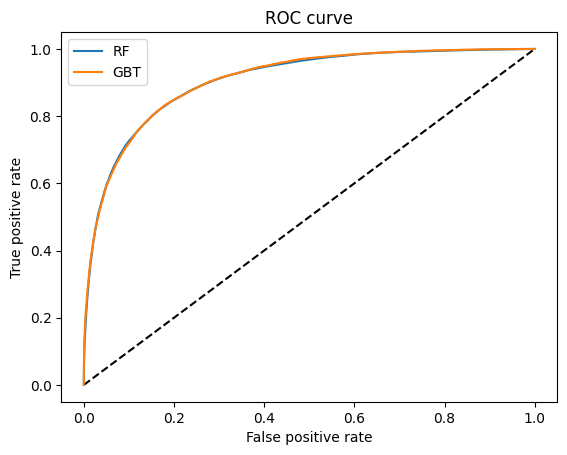

In [120]:
# The random forest model by itself
y_pred_grd_rfcat = rf.predict_proba(test_x)[:, 1]
y_pred_grd_gbtcat = gbt.predict_proba(test_x)[:, 1]

fpr_rf, tpr_rf, _ = roc_curve(test_y.values.reshape(-1, 1).flatten()=="s", y_pred_grd_rfcat)
fpr_gbt, tpr_gbt, _ = roc_curve(test_y.values.reshape(-1, 1).flatten()=="s", y_pred_grd_gbtcat)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_gbt, tpr_gbt, label='GBT')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

**Figure 8:** Above is the ROC curve of using a Random Forrest Tree and Gradient Boosted Tree model with the weights applied. <br>  The plot shows the curve of the False positive rate vs the True positive rate for each model. The RF curve is represented in blue and the GBT label is represented in orange. It is worth mentioning the rates are normalized on both axes. <br> Both curves are improved or equal to the curves in the ROC Curve in Figure 5. I evaluated this by seeing that the curves in this figure roughly pass a point of False positive rate = 0.2 and True positive rate = 0.8. The curves in this figure are extremely close to each other. Since both curves are higher/more in the upper right corner, they have higher rates of True positive compared to false positive. The GBT model in both figures is about the same. The RF model is improved from the applying hte weighs.